In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import timeit

Importing the libraries to use, the same as usual

In [6]:
img = data.astronaut()
img_arr = np.array(img)

For this exercise, we are going to use the astronaut image.

In [7]:
traslacion = (100, 50)

These coordinates are the ones we are going to use to translate our image.

In [8]:
alto, ancho, canales = img_arr.shape

Here we obtain the height and width of our image so that we can iterate through all the pixels in order to change them.

In [9]:
def translation(img):
    img_tras = np.zeros_like(img_arr)
    for y in range(alto):
        for x in range(ancho):
            new_x = x + traslacion[0]
            new_y = y + traslacion[1]

            if 0 <= new_x < ancho and 0 <= new_y < alto:
                img_tras[new_y, new_x] = img[y, x]
    return img_tras

This code defines a translation function that shifts an image (img) based on a translation vector (traslacion). It creates a new empty image (img_tras) and moves each pixel from the original image to its new position. If the new position is within the image bounds, the pixel is placed in img_tras. The function then returns the translated image.

In [10]:
def translation_copy(img):
    img_tras = np.zeros_like(img_arr)
    dx, dy = traslacion
    img_tras[dy:, dx:, :] = img[:-dy, :-dx, :]
    return img_tras

This function, translation_copy, is a more efficient version of the previous translation function. It translates an image by a given translation vector (traslacion) using NumPy's slicing capabilities rather than iterating through each pixel individually.

In [13]:
img_tras = translation_copy(img)

Here we use our best function and put the final image in a variable

In [15]:
%timeit translation(img)

144 ms ± 6.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit translation_copy(img)

45.6 µs ± 971 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


After these outcomes we can conclude that 'translation_copy' is way more efficient that the first solution.

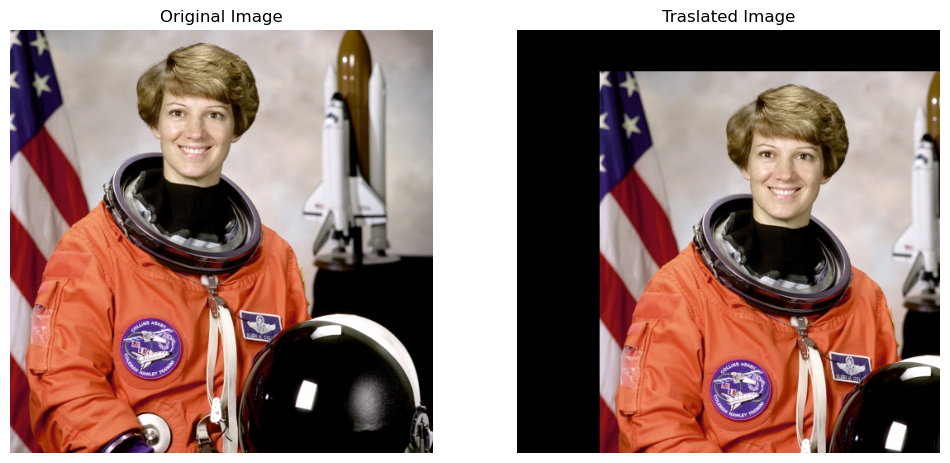

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_tras)
ax[1].set_title('Traslated Image')
ax[1].axis('off')

plt.show()